# Laboratorio 5 CNYT
## Oscar Nicolas Piñeros Campo 

In [10]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
def decimal_a_binario(n, k):
    '''
    Esta función recibe una longitud n y un entero k. Retorna una lista de longitud n tal que cada elemento
    es un dígito de la representación binaria de k.
    '''
    lista_binaria = []
    
    for i in reversed(range(n)):
        bit = k // 2**i
        k = k % 2**i
        lista_binaria.append(bit)
    
    return lista_binaria

In [3]:
def evaluar_oraculo_en_c(oraculo, c):
    
    tam = oraculo.num_qubits   # Tamaño o número de qubits que abarca el oráculo. No cambiar.
    
    ## Declaren el circuito cuántico con los parámetros adecuados:
    circuito = QuantumCircuit(tam, 1)      
    
    ## Inicialización
    ## Usen este ciclo for y un condicional if dentro del for para inicializar con el valor de c 
    ## los alambres superiores según los bits contenidos en la lista c. 
    for i in range(len(c)):
        if c[i] == 1:
            circuito.x(i)
    
    # Insertar circuito. No cambiar el segundo parámetro.
    circuito.append(oraculo, list(range(tam)))
    
    ## Medición
    ## Añadan la medición con los parámetros adecuados:
    circuito.measure(tam - 1, 0)
    
    ## Realización de la simulación con 1 shot 
    simulador = Aer.get_backend('qasm_simulator')
    conteos = execute(circuito, backend = simulador, shots = 1).result().get_counts()
    valor_orac_en_c = int(list(conteos.keys())[0]) # No cambiar. Extrae del diccionario el estado medido
    
    ## Retornar lo solicitado en las indicaciones
    return valor_orac_en_c  

In [4]:
def tabular_oraculo(oraculo):
    '''
    Esta función recibe como argumento una compuerta cuántica (oráculo) e imprime la tabulación de los valores
    de f para toda cadena en su dominio.
    '''
    n = oraculo.num_qubits - 1   # Determina la longitud de las cadenas de 0s y 1s en el conjunto de salida de f.
    ## Crear un print que escriba el título de la tabulación según lo pedido en las indicaciones
    
    print("Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}")
    print("-----------------------------------------------------")
    
    # Este ciclo for debe recorrer los enteros de 0 a 2^n - 1. Notemos que al pasar esos números 
    # a binario obtendremos todas las posibles cadenas de 0s y 1s de longitud n. 
    # (Desde 00...0 hasta 11...1)
     
    respuesta = []
    
    # Completar 
    for i in range((2**n)):   
        
        ## Completar con los parámetros adecuados para obtener una lista que contenga la 
        ## representación binaria del contador del ciclo.
        s = decimal_a_binario(n,i)
        
        ## La variable 'valor' debe corresponder al valor de f(s) y debe hallarse usando la 
        ## función del ejercicio anterior
        valor = evaluar_oraculo_en_c(oraculo, s)                   
        
        lista_a_cadena = ''.join([str(bit) for bit in s]) # Simplemente convierte la lista s a cadena para su
                                                          # uso en el print. No cambiar.
        
        ## Completar el print para que escriba la línea solicitada en las indicaciones.
        respuesta += [str(valor)]
        print("f("+lista_a_cadena+") = "+ str(valor))
       
    return respuesta

## Ejercicio 1

a. Diagrama de la función estilo conjuntos y flechas

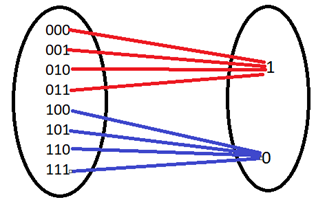

b. Todas las entradas que comienzan en 0 van a 1 y todas las entradas que empiezan en 1 se dirigen a 0.
Lo que significa que las que empiezan por un valor terminan en su opuesto.


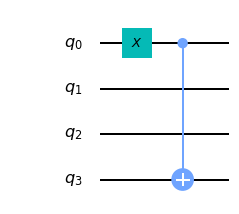

In [5]:
#Dibujamos el circuito correspondiente a la funcion con la condicion anteriormente mencionada 
circuito1 = QuantumCircuit(4)
circuito1.x(0)
circuito1.cx(0,3)
circuito1.draw(output = 'mpl')

d. Se realiza una negación a la entrada del primer alambre y se usa un cnot del primer al último alambre ya que de esta forma se consigue el opuesto de la entrada independientemente de los otros alambres

In [6]:
#e. encapsular el circuito dentro de una compuerta para formar un circuito
oraculo = circuito1.to_gate()
oraculo.name = 'Oráculo'

In [7]:
#f. se tabula la funcion codificada en el oraculo
tabular_oraculo(oraculo)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
-----------------------------------------------------
f(000) = 1
f(001) = 1
f(010) = 1
f(011) = 1
f(100) = 0
f(101) = 0
f(110) = 0
f(111) = 0


['1', '1', '1', '1', '0', '0', '0', '0']

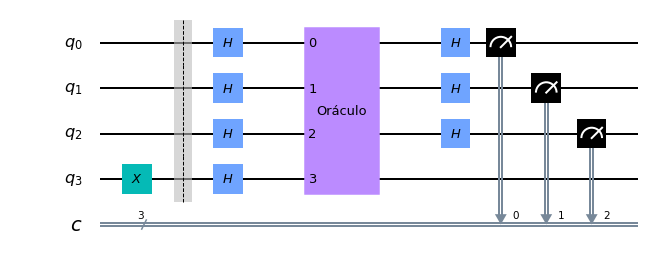

In [8]:
circuito1c = QuantumCircuit(4,3)
circuito1c.x(3)
circuito1c.barrier()
circuito1c.h([0,1,2,3])
circuito1c.append(oraculo, [0,1,2,3])
circuito1c.h([0,1,2])
circuito1c.measure(0, 0)
circuito1c.measure(1, 1)
circuito1c.measure(2, 2)
circuito1c.draw(output='mpl')

Job Status: job has successfully run
{'101': 4, '100': 1, '010': 15, '011': 29, '000': 85, '001': 866}


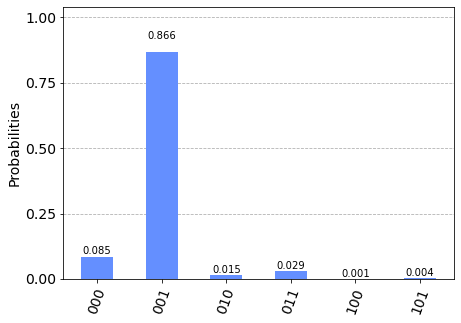

In [11]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_valencia')
ejecucion = execute(circuito1c, backend=comp_cuantico,shots=1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
conteos = ejecucion.result().get_counts()
print(conteos)
plot_histogram(conteos)

### Observaciones ejercicio 1
Se realiza la ejecucion en el computador cuantico de Valencia, el estado 000 presenta un porcentaje bajo en magnitud siendo del 8,5% mas sin embargo significativo con respecto a las demas entradas siendo esta la segunda mas significativa lo cual tiene sentido ya que dadas las caracteristicas especificadas anteriormente este estado corresponde a 1.

## Ejercicio 2 

a. Diagrama de la función estilo conjuntos y flechas
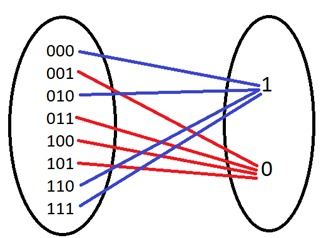

b.Valores que se dirigen a 1 empiezan con 11 y empiezan y terminan en 0.

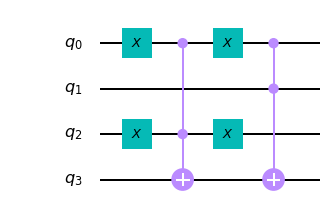

In [12]:
#c. Dibujamos el circuito correspondiente a la funcion con la condicion anteriormente mencionada 
circuito3 = QuantumCircuit(4)
circuito3.x([0,2])
circuito3.ccx(0,2,3)
circuito3.x([0,2])
circuito3.ccx(0,1,3)
circuito3.draw(output = 'mpl')

d. Construimos la negación del toffoli en el primer y tercer alambre para la condición de que empiezan y terminan en 0 y realizamos un toffoli para los dos primeros alambres para hacer el control de los que comienzan por 11 

In [13]:
#e. encapsular el circuito dentro de una compuerta para formar un circuito
oraculo3 = circuito3.to_gate()
oraculo3.name = 'Oraculo3'

In [14]:
#f. se tabula la funcion codificada en el oraculo
tabular_oraculo(oraculo3)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
-----------------------------------------------------
f(000) = 1
f(001) = 0
f(010) = 1
f(011) = 0
f(100) = 0
f(101) = 0
f(110) = 1
f(111) = 1


['1', '0', '1', '0', '0', '0', '1', '1']

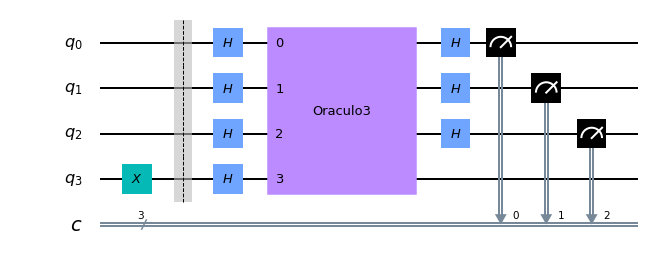

In [15]:
circuito2c = QuantumCircuit(4,3)
circuito2c.x(3)
circuito2c.barrier()
circuito2c.h([0,1,2,3])
circuito2c.append(oraculo3, [0,1,2,3])
circuito2c.h([0,1,2])
circuito2c.measure(0, 0)
circuito2c.measure(1, 1)
circuito2c.measure(2, 2)
circuito2c.draw(output='mpl')

Job Status: job has successfully run
{'110': 80, '101': 135, '100': 158, '011': 113, '000': 213, '010': 110, '111': 71, '001': 120}


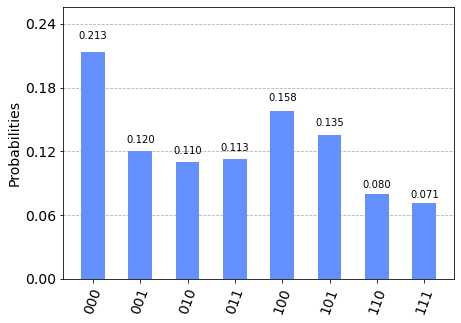

In [16]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_valencia')
ejecucion = execute(circuito2c, backend=comp_cuantico,shots=1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
conteos = ejecucion.result().get_counts()
print(conteos)
plot_histogram(conteos)

### Observaciones ejercicio 2
El computador cuantico usado es el de Valencia, si se presenta el estado 000 como el estado con mayor porcentaje siendo este de 21,3% lo cual si es esperado ya que es una de las entradas especificadas para 1

## Ejercicio 3

a. Diagrama de la funcion estilo conjunto y flechas
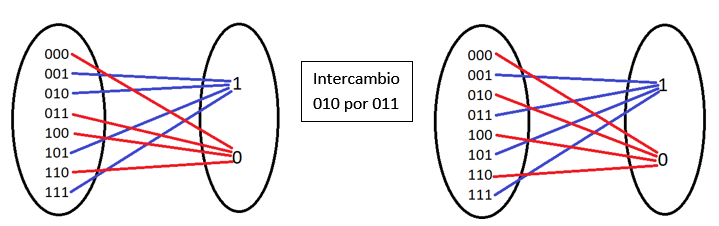
b. Vemos que a 1 se dirigen entradas terminadas en 11 para la cual realizamos el intercambio y terminadas en 01

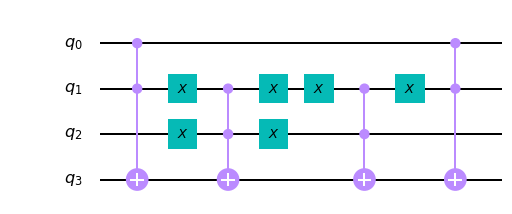

In [17]:
#c. Dibujamos el circuito correspondiente a la funcion con la condicion anteriormente mencionada 
circuito5 = QuantumCircuit(4)
circuito5.ccx(0,1,3)
circuito5.x([1,2])
circuito5.ccx(1,2,3)
circuito5.x([1,2])
circuito5.x(1)
circuito5.ccx(1,2,3)
circuito5.x(1)
circuito5.ccx(0,1,3)
circuito5.draw(output='mpl')

d. Realizamos el intercambio con el primer y ultimo modulo para posteriormente realizar un toffoli para las entradas que terminan en 11 y el siguiente modulo se encarga de las entradas terminadas en 01.

In [18]:
#e. encapsular el circuito dentro de una compuerta para formar un circuito
oraculo5 = circuito5.to_gate()
oraculo5.name='Oraculo5'

In [19]:
#f. se tabula la funcion codificada en el oraculo
tabular_oraculo(oraculo5)

Tabla de valores de la función f:{0, 1}^3 ---> {0, 1}
-----------------------------------------------------
f(000) = 1
f(001) = 1
f(010) = 0
f(011) = 0
f(100) = 1
f(101) = 1
f(110) = 0
f(111) = 0


['1', '1', '0', '0', '1', '1', '0', '0']

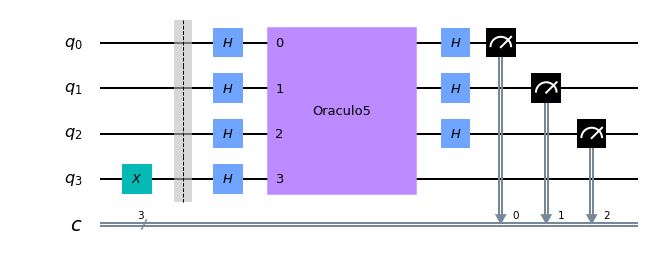

In [21]:
circuito3c = QuantumCircuit(4,3)
circuito3c.x(3)
circuito3c.barrier()
circuito3c.h([0,1,2,3])
circuito3c.append(oraculo5, [0,1,2,3])
circuito3c.h([0,1,2])
circuito3c.measure(0, 0)
circuito3c.measure(1, 1)
circuito3c.measure(2, 2)
circuito3c.draw(output='mpl')

Job Status: job has successfully run
{'110': 132, '101': 88, '100': 80, '011': 133, '000': 120, '010': 186, '111': 131, '001': 130}


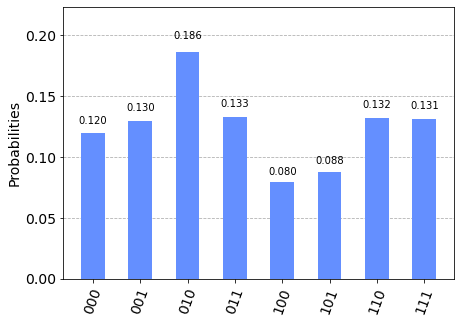

In [22]:
proveedor = IBMQ.get_provider('ibm-q')
comp_cuantico = proveedor.get_backend('ibmq_valencia')
ejecucion = execute(circuito3c, backend=comp_cuantico,shots=1000)
from qiskit.tools.monitor import job_monitor
job_monitor(ejecucion)
conteos = ejecucion.result().get_counts()
print(conteos)
plot_histogram(conteos)

### Observaciones Ejercicio 3
La ejecucion se realiza en el computador cuantico de Valencia, El estado 000 se presenta parcticamente en el porcentaje promedio no siendo muy significativo para las mediciones lo cual sigue las caracteristicas de la funcion que se especifico anteriormente 

## Analisis Final
Todas las ejecuciones se realizaron en el computador cuantico de Valencia y se debe tener en cuenta la incertidumbre y ruido que se presentaron en las mediciones de cada ejercicio, el porcentaje para el estado 000 en los ejercicios,si bien no representaron mas del 22% de las ejecuciones, estos no tienen un rango cercano entre ellos (8.5% - 21.3% - 12%). Esto se debe a que las especificaciones y por tanto circuitos para cada ejercicio eran totalmente diferentes por lo que sus funcionalidades y modulos no correspondian y por tanto no hay relacion notable en las graficas de los estados.